In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.linear_model import LogisticRegressionCV

from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

!pip install imblearn
from imblearn.over_sampling import SMOTE



  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2343 sha256=d67bb169dd9031a6911d9b5209cb1b7ef1230a1e582c845db400a01618537ea3
  Stored in directory: /Users/bruno/Library/Caches/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
ERROR: Could not find a version that satisfies the requirement seabron
ERROR: No matching distribution found for seabron


ModuleNotFoundError: No module named 'pandas'

In [ ]:
data = pd.read_csv('COVAREP_and_depression_data_mean.csv')
data.head(5)

,Unnamed: 0,F0,VUV,NAQ,QOQ,H1H2,PSP,MDQ,peakSlope,Rd,...,HMPDD_7,HMPDD_8,HMPDD_9,HMPDD_10,HMPDD_11,HMPDD_12,PHQ8_Binary,PHQ8_Score,Gender,patientId
0,0,153.594993,1.0,0.106205,0.342255,2.374461,0.295947,0.122276,-0.345056,1.443603,...,-0.485182,-0.398215,-0.309372,-0.221603,-0.150994,-0.085740,0.0,2.0,1.0,300.0
1,0,115.832283,1.0,0.102055,0.362536,-0.255189,0.217295,0.091380,-0.395940,1.296101,...,-0.441811,-0.436391,-0.355014,-0.344293,-0.272294,-0.199341,0.0,3.0,1.0,301.0
2,0,125.675550,1.0,0.063829,0.235365,2.326957,0.475797,0.114153,-0.408465,1.679126,...,-0.510800,-0.447550,-0.406698,-0.350424,-0.297138,-0.232945,0.0,4.0,1.0,302.0
3,0,199.187302,1.0,0.119407,0.423627,5.859107,0.267404,0.112478,-0.359892,1.506194,...,-0.447727,-0.337174,-0.176141,-0.080596,0.005553,0.081089,0.0,0.0,0.0,303.0
4,0,218.017081,1.0,0.117237,0.386444,5.060366,0.268287,0.116142,-0.354865,1.470331,...,-0.404727,-0.238044,-0.106150,-0.002209,0.068352,0.127041,0.0,6.0,0.0,304.0


In [ ]:
data.drop('VUV', axis = 1, inplace = True)
data.drop('patientId', axis = 1, inplace = True)


data.head()

,Unnamed: 0,F0,NAQ,QOQ,H1H2,PSP,MDQ,peakSlope,Rd,Rd_conf,...,HMPDD_6,HMPDD_7,HMPDD_8,HMPDD_9,HMPDD_10,HMPDD_11,HMPDD_12,PHQ8_Binary,PHQ8_Score,Gender
0,0,153.594993,0.106205,0.342255,2.374461,0.295947,0.122276,-0.345056,1.443603,0.532948,...,-0.600582,-0.485182,-0.398215,-0.309372,-0.221603,-0.150994,-0.085740,0.0,2.0,1.0
1,0,115.832283,0.102055,0.362536,-0.255189,0.217295,0.091380,-0.395940,1.296101,0.707994,...,-0.552128,-0.441811,-0.436391,-0.355014,-0.344293,-0.272294,-0.199341,0.0,3.0,1.0
2,0,125.675550,0.063829,0.235365,2.326957,0.475797,0.114153,-0.408465,1.679126,0.630948,...,-0.569240,-0.510800,-0.447550,-0.406698,-0.350424,-0.297138,-0.232945,0.0,4.0,1.0
3,0,199.187302,0.119407,0.423627,5.859107,0.267404,0.112478,-0.359892,1.506194,0.672752,...,-0.648388,-0.447727,-0.337174,-0.176141,-0.080596,0.005553,0.081089,0.0,0.0,0.0
4,0,218.017081,0.117237,0.386444,5.060366,0.268287,0.116142,-0.354865,1.470331,0.641787,...,-0.602905,-0.404727,-0.238044,-0.106150,-0.002209,0.068352,0.127041,0.0,6.0,0.0


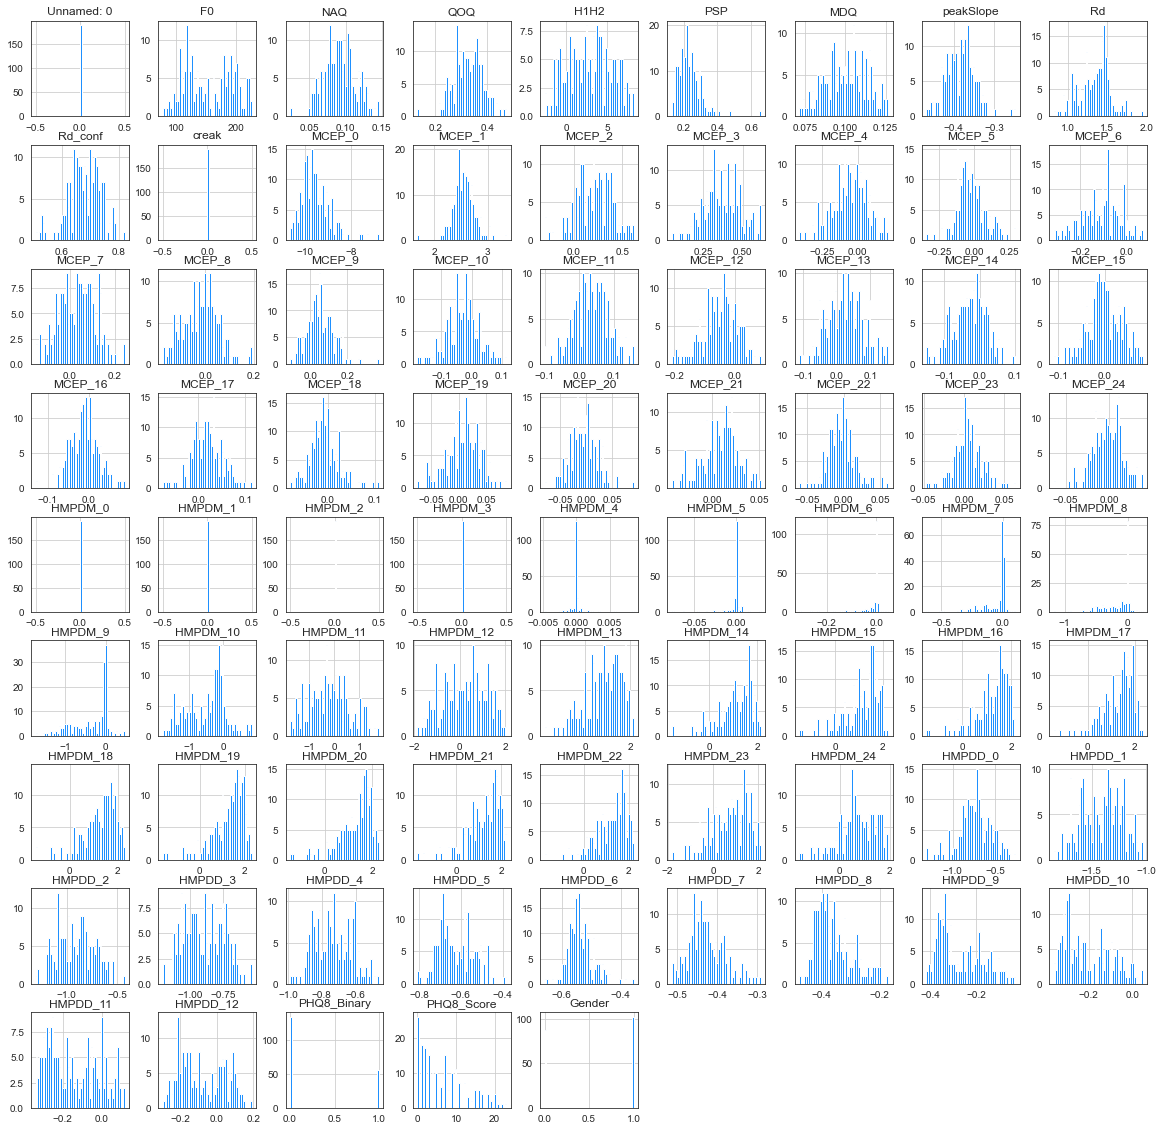

In [ ]:
sns.set_style('white')
data.hist(bins=50,figsize=(20,20),color='dodgerblue');

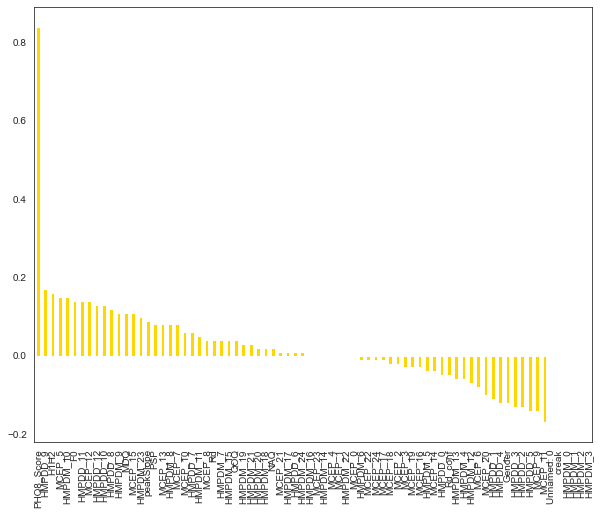

<Figure size 5760x4320 with 0 Axes>

In [ ]:
 
ca = round(data.corr()['PHQ8_Binary'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar' ,color='gold' , figsize = (10,8))
plt.figure(figsize=(80,60))
plt.show() 

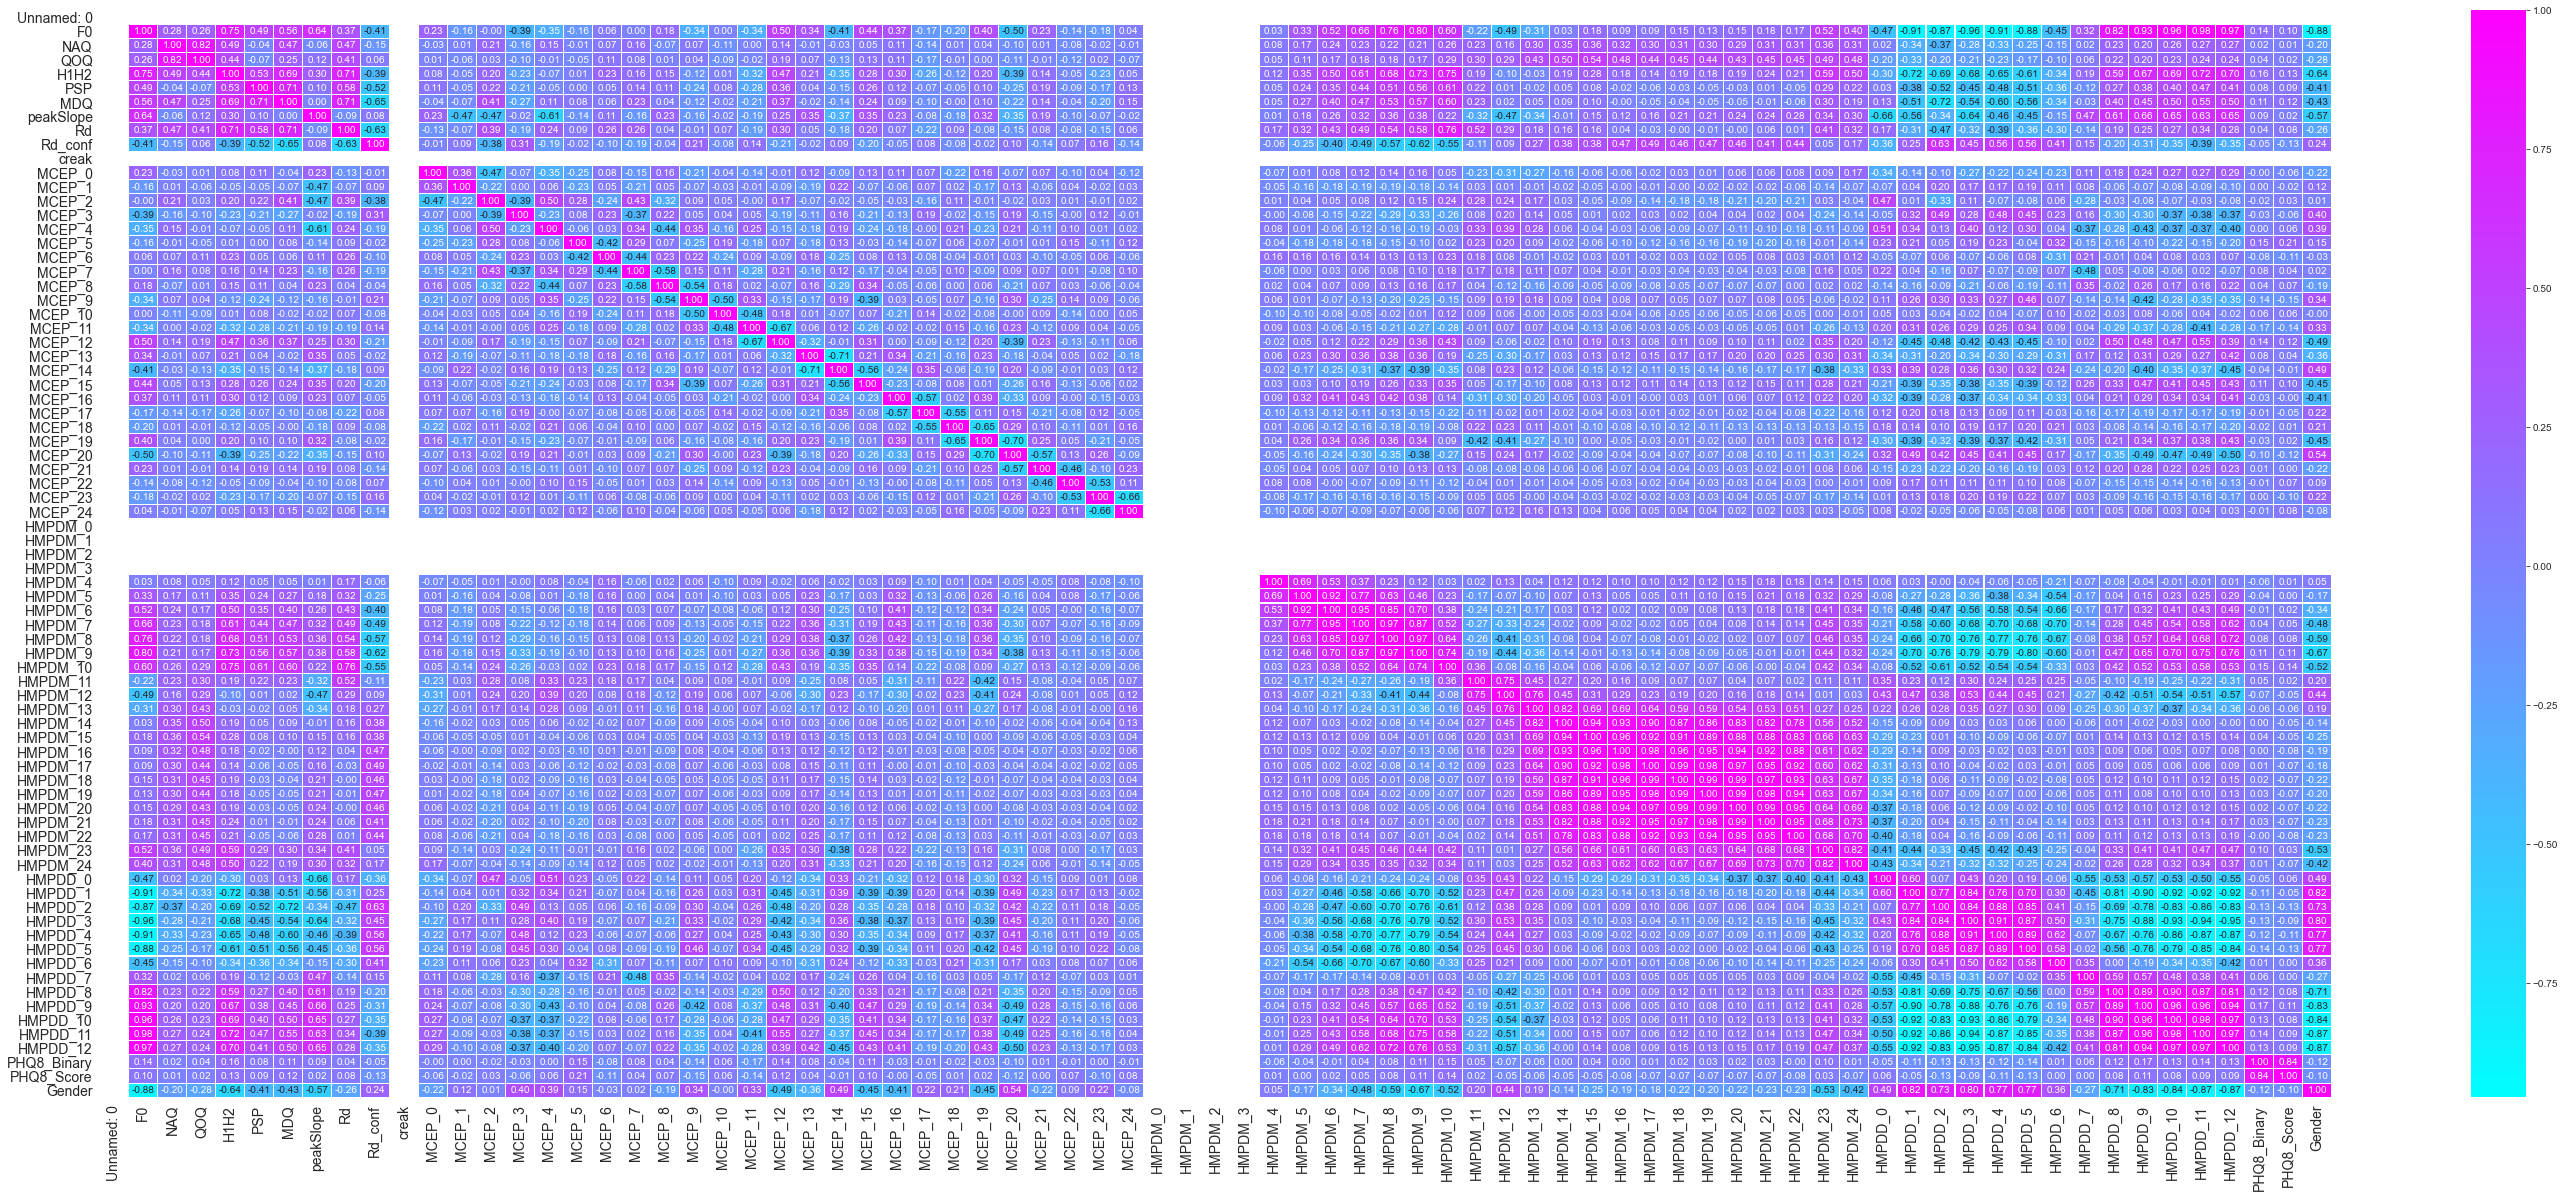

In [ ]:
#another way of visualizing it is with the heatmap
fig = plt.subplots(figsize=[50,20])
sns.heatmap(data.corr(),  annot=True, linewidths=0.05, fmt= '.2f',cmap='cool')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show() 

In [ ]:
cor = data.corr()['PHQ8_Binary']
cor.dropna(inplace=True)
indexes = cor[(cor <= 0.05) & (cor >=-0.05)].index

cor.drop(indexes, inplace = True)

cor.info()



<class 'pandas.core.series.Series'>
Index: 36 entries, F0 to Gender
Series name: PHQ8_Binary
Non-Null Count  Dtype  
--------------  -----  
36 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


In [ ]:
data_new = data[cor.index]
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   F0           189 non-null    float64
 1   H1H2         189 non-null    float64
 2   PSP          189 non-null    float64
 3   MDQ          189 non-null    float64
 4   peakSlope    189 non-null    float64
 5   MCEP_5       189 non-null    float64
 6   MCEP_6       189 non-null    float64
 7   MCEP_7       189 non-null    float64
 8   MCEP_9       189 non-null    float64
 9   MCEP_10      189 non-null    float64
 10  MCEP_11      189 non-null    float64
 11  MCEP_12      189 non-null    float64
 12  MCEP_13      189 non-null    float64
 13  MCEP_15      189 non-null    float64
 14  MCEP_20      189 non-null    float64
 15  HMPDM_4      189 non-null    float64
 16  HMPDM_8      189 non-null    float64
 17  HMPDM_9      189 non-null    float64
 18  HMPDM_10     189 non-null    float64
 19  HMPDM_12

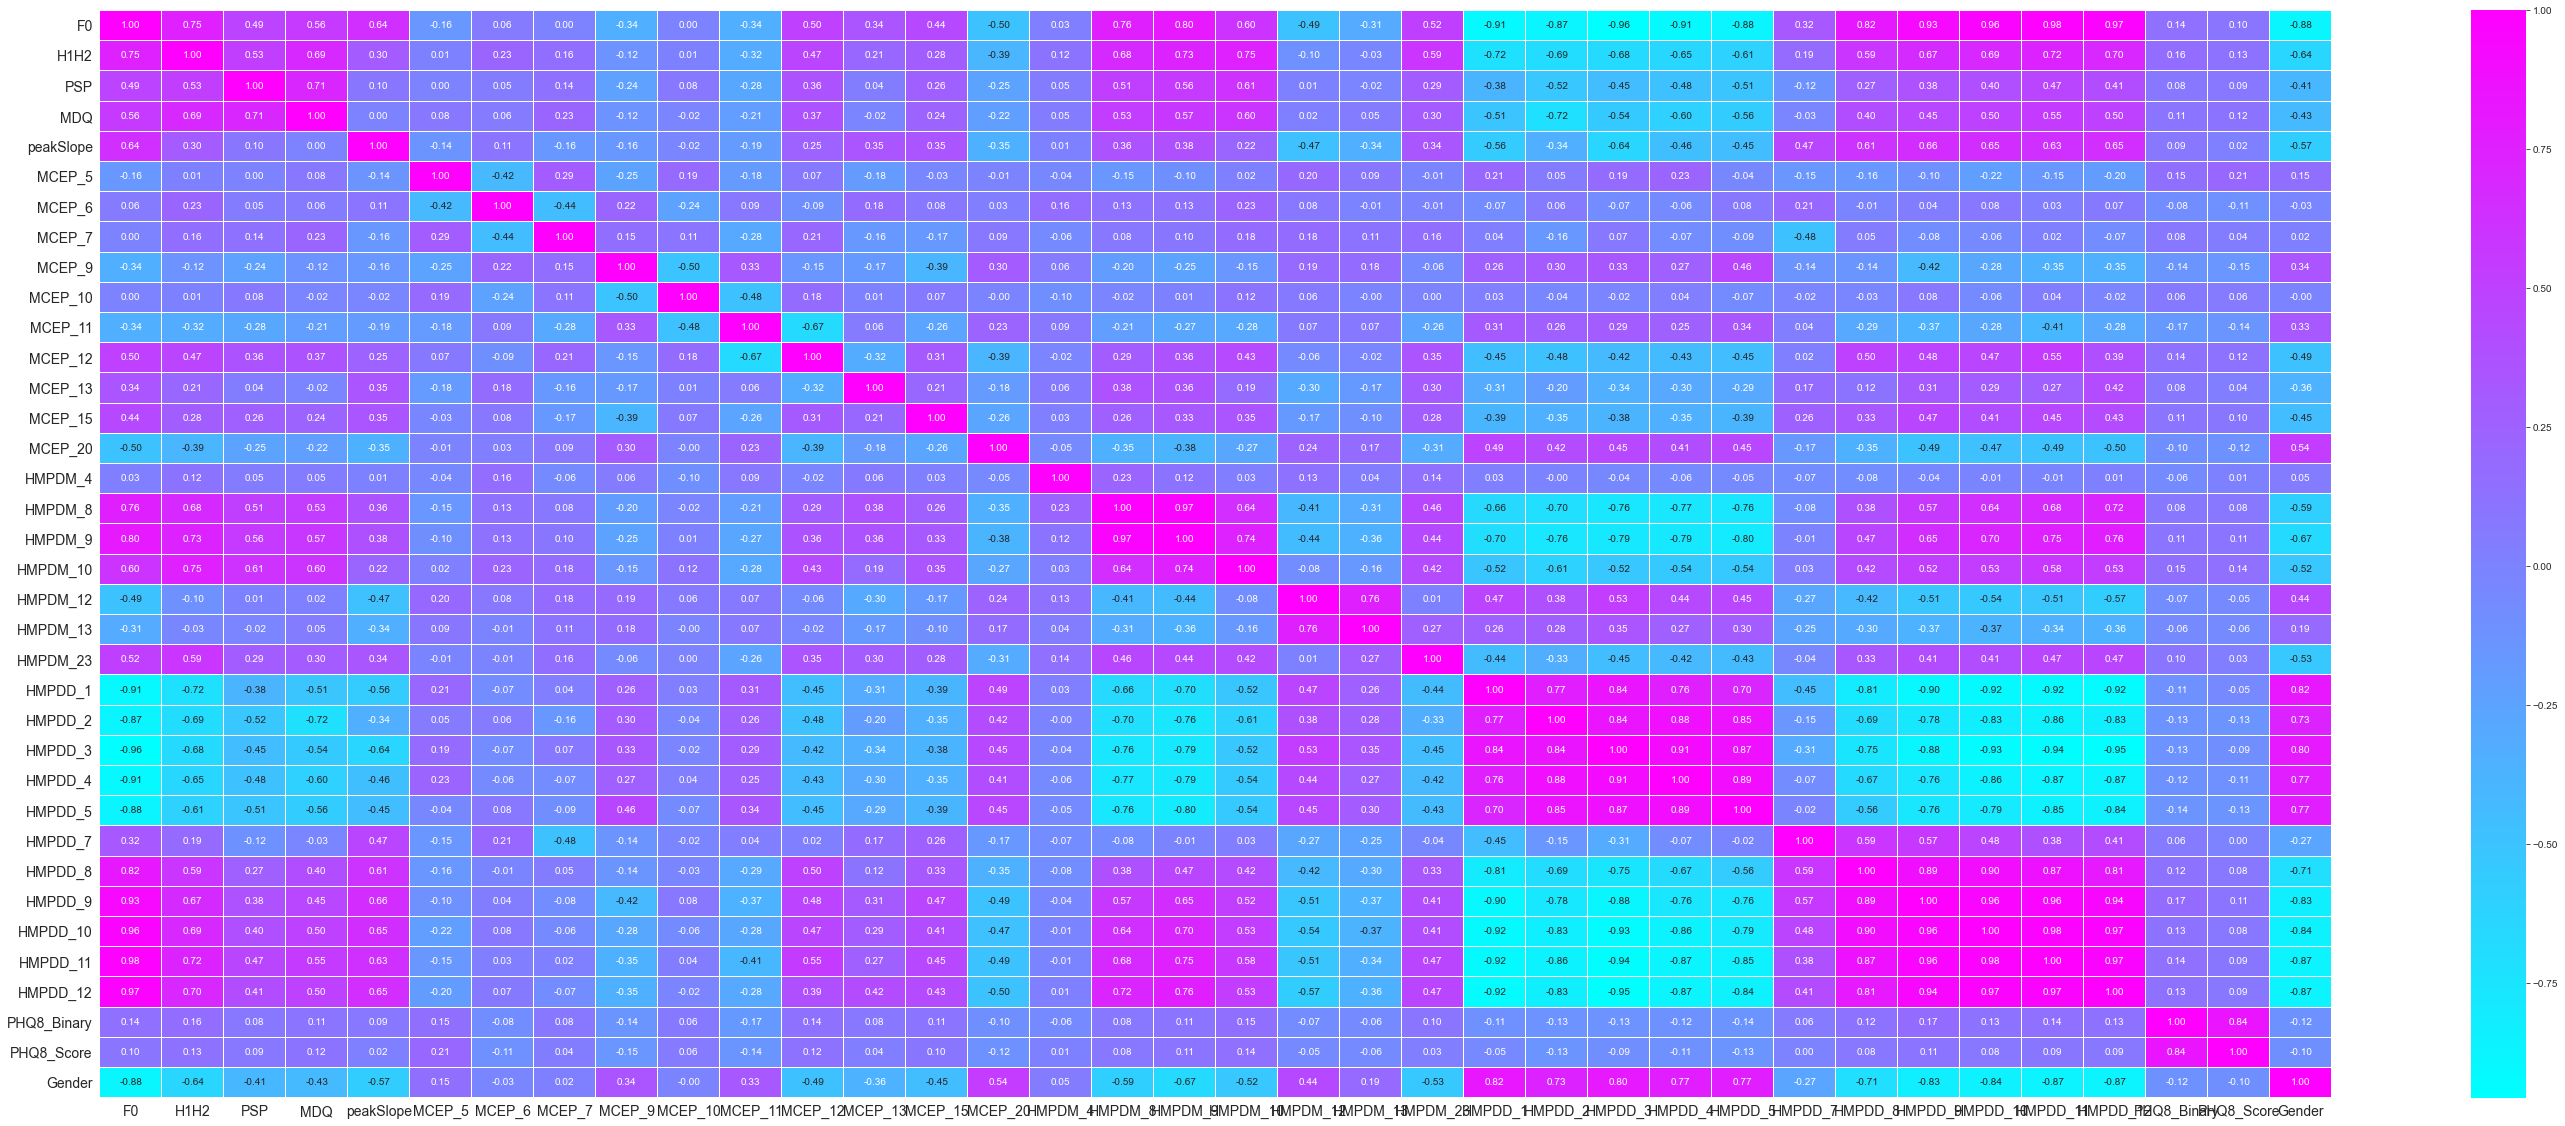

In [ ]:
fig = plt.subplots(figsize=[50,20])
sns.heatmap(data_new.corr(),  annot=True, linewidths=0.05, fmt= '.2f',cmap='cool')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show() 

In [ ]:


train, test = train_test_split(data_new, test_size = 0.10, train_size = 0.90, random_state=0)

train_labels = train['PHQ8_Binary']
train_phq_score = train['PHQ8_Score']
test_labels = test['PHQ8_Binary']
test_phq_score = test['PHQ8_Score']
train.drop('PHQ8_Binary', axis = 1, inplace = True)
train.drop('PHQ8_Score', axis = 1, inplace = True)
test.drop('PHQ8_Binary', axis = 1, inplace = True)
test.drop('PHQ8_Score', axis = 1, inplace = True)
balance = SMOTE(sampling_strategy='auto')
train, train_labels = balance.fit_resample(train, train_labels)

train_labels.value_counts()

# print(train.shape)
# print(test.shape)

(170, 34)
(19, 34)


<ipython-input-221-fbfcb2c87845>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('PHQ8_Binary', axis = 1, inplace = True)
<ipython-input-221-fbfcb2c87845>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('PHQ8_Score', axis = 1, inplace = True)
<ipython-input-221-fbfcb2c87845>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('PHQ8_Binary', axis = 1, inplace = True)
<ipython-input-221-fbfcb2c87845>:10: Se

In [ ]:
pca = PCA(n_components=3)
pca.fit(train)
train_pca = pca.transform(train)

train_pca.shape

(170, 3)

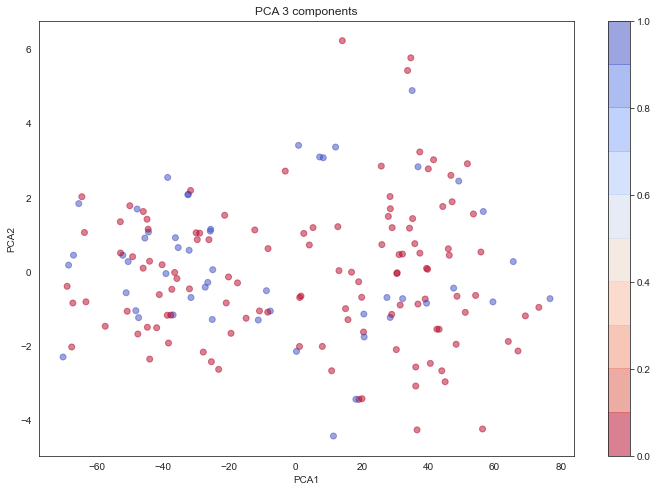

In [ ]:
plt_pic = plt.figure(figsize=(12,8))
plt.scatter(train_pca[:,0],train_pca[:,1], c = train_labels, alpha =0.5 , cmap = plt.cm.get_cmap('coolwarm_r',10))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA 3 components')
plt.colorbar();

In [ ]:
logReg = LogisticRegressionCV(penalty='l2', cv = 5)
logReg.fit(train_pca, train_labels)
test_pca = pca.transform(test)
predicted_pca = logReg.predict(test_pca)
test_labels = test_labels.to_numpy()

# print(predicted_pca)

print('acc',accuracy_score(test_labels, predicted_pca))
print('recall',recall_score(test_labels, predicted_pca))
print('prec',precision_score(test_labels, predicted_pca))
print('f1',f1_score(test_labels, predicted_pca))

acc 0.7368421052631579
recall 0.0
prec 0.0
f1 0.0


/Users/bruno/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
